<a href="https://colab.research.google.com/github/ksubramanian02/BME450-project-Repository/blob/main/Final_BME_450_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BME 450 Image Classification Project
###By: Kaushik Subramanian and Trevor Sargent

![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)

## Training an image classifier

We will do the following steps in order:

1. Load and normalize the Alzhimer's MRI image training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## Import Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader as DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = datasets.ImageFolder(root='/content/drive/MyDrive/BME 450 Project/Alzheimers Dataset/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.ImageFolder(root='/content/drive/MyDrive/BME 450 Project/Alzheimers Dataset/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('Mild', 'Moderate', 'Non', 'VeryMild')

### Confirm Proper Import of Data





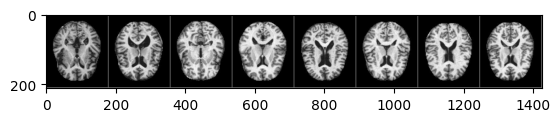

Mild  Non   Non   Non   Mild  VeryMild Non   Non  


In [ ]:

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print(images[0].shape, images[0].mean(), images[0].std())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. Define a Convolutional Neural Network


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 16, 5)
        self.fc1 = nn.Linear(32144, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
#         print(x.shape)
        x = self.pool(F.relu(x))
#         print(x.shape)
        x = self.conv2(x)
#         print(x.shape)
        x = self.pool(F.relu(x))
#         print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#         print(x.shape)
        return x


net = Net()

# test sizes
net(images)

tensor([[ 0.0356,  0.0925,  0.1007, -0.0200,  0.0141, -0.0767,  0.0258, -0.0939,
          0.0995, -0.0373],
        [ 0.0408,  0.0929,  0.0991, -0.0226,  0.0185, -0.0710,  0.0317, -0.0994,
          0.1030, -0.0425],
        [ 0.0376,  0.0886,  0.0878, -0.0226,  0.0180, -0.0705,  0.0297, -0.0928,
          0.0988, -0.0399],
        [ 0.0404,  0.0901,  0.0935, -0.0316,  0.0192, -0.0728,  0.0301, -0.0943,
          0.0998, -0.0438],
        [ 0.0381,  0.0975,  0.0916, -0.0257,  0.0156, -0.0667,  0.0382, -0.0935,
          0.0948, -0.0405],
        [ 0.0493,  0.0947,  0.0977, -0.0205,  0.0222, -0.0666,  0.0320, -0.0951,
          0.0973, -0.0412],
        [ 0.0351,  0.0942,  0.0937, -0.0292,  0.0273, -0.0657,  0.0375, -0.0988,
          0.0949, -0.0370],
        [ 0.0439,  0.0958,  0.0897, -0.0221,  0.0216, -0.0676,  0.0346, -0.0964,
          0.0968, -0.0426]], grad_fn=<AddmmBackward0>)

### 3. Define a Loss function and Optimizer
Loss Function: Classification Cross-Entropy

Optimization Function: SGD with Adam Optimizer



In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

### 4. Train the network

Loop through data iterator, feed inputs to the network and optimize.



In [ ]:
training_loss = []
testing_loss = []
epoch_array = []
epoch_array2 = []

i = 1
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    num_batch = 0
    running_loss2 = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i == 4:
            print(f'[{epoch + 1}, {i + 1:4d}] loss: {running_loss / 4:.3f}')
            training_loss.append(running_loss/4)
            epoch_array.append(epoch)
        #training_loss.append(running_loss/50)
        running_loss = 0.0

    for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero optimizer
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #Recording training loss
        running_loss2 += loss.item()

    #testing_loss.append(running_loss2/50)
        if i == 4:
            print(f'[{epoch + 1}, {i + 1:4d}] loss: {running_loss2 / 4:.3f}')
            testing_loss.append(running_loss2/4)
            epoch_array2.append(epoch)
        running_loss2 = 0.0
print('Finished Training')

# Plot the loss values over time
plt.plot(epoch_array, training_loss, label = 'Training Loss')
plt.plot(epoch_array2, testing_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend
plt.show()

NameError: name 'plt' is not defined

Save the trained model:

 See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)



### 5. Test the network on the test data

Evaluate training by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.


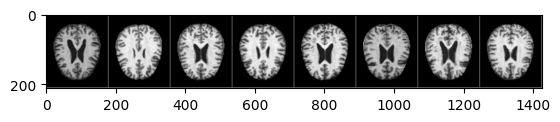

GroundTruth:  Non   Non   VeryMild Non   Mild  Non   Mild  VeryMild


In [ ]:

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Load in our saved model


In [ ]:

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Predict class with Neural Network



In [ ]:

outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Non   Non   VeryMild Non  


See how the network performs on the whole dataset.



In [ ]:

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 1279 test images: {100 * correct // total} %')

Accuracy of the network on the 1279 test images: 100 %


Looks better than chance, which is 25% accuracy (randomly picking
a class out of 4 classes).



### Class level accuracy

In [ ]:

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Mild  is 100.0 %
Accuracy for class: Moderate is 100.0 %
Accuracy for class: Non   is 100.0 %
Accuracy for class: VeryMild is 100.0 %



## Training on GPU
Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)

Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = data[0].to(device), data[1].to(device)

## Training on multiple GPUs
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.